# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
#import sys
#!{sys.executable} -m pip install citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list (we don't want duplicates!)
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

663


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_name = cities[0]
units = "imperial"

# Set up empty lists to later append (prepare for the DataFrame)

name_list = []
lat_list = []
lng_list = []
max_temp_list = [] 
humidity_list = []
cloudiness_list = []
wind_speed_list = []
country_list = []
date_list = []


print("""Beinning Data Retrieval
         ------------------------------
      """)

for city in cities:
    query_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}"

    weather_response = requests.get(query_url)
    
    weather_response_json = weather_response.json()
    
    try:
        name = weather_response_json["name"]
        if name not in name_list:
            name_list.append(name)
    except KeyError:
        continue
        print(f"CITY NAME NOT FOUND!  SKIPPING...")
    
    if name:
        print(f"Processing Record {cities.index(city) + 1} of {len(cities)} | {name}")
        
    # Get the city name, lat, long, max temp, humidity, cloudiness, wind speed, country, and date

    coord = weather_response_json.get("coord")
    if coord:
        lat = coord.get("lat")
        lng = coord.get("lon")
        lat_list.append(lat)
        lng_list.append(lng)
    else:
        lat_list.append("")
        lng_list.append("")
    
    main = weather_response_json.get("main")
    if main:
        max_temp = main.get("temp_max")
        humidity = main.get("humidity")
        max_temp_list.append(max_temp)
        humidity_list.append(humidity)
    else:
        max_temp_list.append("")
        humidity_list.append("")
    
    clouds = weather_response_json.get("clouds")
    if clouds:
        cloudiness = clouds.get("all")
        cloudiness_list.append(cloudiness)
    else:
        cloudiness_list.append("")
        
    wind = weather_response_json.get("wind")    
    if wind:
        wind_speed = wind.get("speed")
        wind_speed_list.append(wind_speed)
    else:
        wind_speed_list.append(wind_speed)

    sys = weather_response_json.get("sys")
    if sys:
        country = sys.get("country")
        country_list.append(country)
    else:
        country_list.append("")

    date = weather_response_json.get("dt")
    date_list.append(date)




print("""------------------------
         #Data Retrieval Complete
#------------------------
#""")

#pprint(weather_response_json)



Beinning Data Retrieval
         ------------------------------
      
Processing Record 1 of 663 | Vestmannaeyjar
Processing Record 2 of 663 | Kapoeta
Processing Record 3 of 663 | Tigil'
Processing Record 4 of 663 | Mahébourg
Processing Record 5 of 663 | Busselton
Processing Record 6 of 663 | Vaini
Processing Record 7 of 663 | Bredasdorp
Processing Record 8 of 663 | Upernavik
Processing Record 9 of 663 | Hong Kong
Processing Record 10 of 663 | Hermanus
Processing Record 11 of 663 | Hithadhoo
Processing Record 12 of 663 | Rikitea
Processing Record 13 of 663 | Lebu
Processing Record 14 of 663 | Tegul'det
Processing Record 15 of 663 | Guerrero Negro
Processing Record 16 of 663 | Esperance
Processing Record 17 of 663 | Kapaa
Processing Record 18 of 663 | Padang
Processing Record 19 of 663 | Punta Arenas
Processing Record 20 of 663 | Katsuura
Processing Record 21 of 663 | Departamento de Maldonado
Processing Record 22 of 663 | Tarata
Processing Record 23 of 663 | Severo-Kuril'sk
Processing

Processing Record 218 of 663 | Ust'-Ilimsk
Processing Record 219 of 663 | Fairbanks
Processing Record 220 of 663 | Carballo
Processing Record 221 of 663 | Bandarbeyla
Processing Record 224 of 663 | San Andrés
Processing Record 225 of 663 | Zunyi
Processing Record 226 of 663 | Paris
Processing Record 227 of 663 | Paita
Processing Record 228 of 663 | Longyearbyen
Processing Record 229 of 663 | Yagodnoye
Processing Record 230 of 663 | Callaguip
Processing Record 231 of 663 | Launceston
Processing Record 232 of 663 | Deputatsky
Processing Record 233 of 663 | Plátanos
Processing Record 234 of 663 | Mosquera
Processing Record 235 of 663 | Caconda
Processing Record 236 of 663 | Paranavaí
Processing Record 237 of 663 | Salalah
Processing Record 238 of 663 | Nabire
Processing Record 240 of 663 | Oxford
Processing Record 241 of 663 | Nanortalik
Processing Record 242 of 663 | Portland
Processing Record 243 of 663 | Dicabisagan
Processing Record 244 of 663 | Kaitangata
Processing Record 245 of 663

Processing Record 437 of 663 | Bima
Processing Record 438 of 663 | Carinhanha
Processing Record 439 of 663 | Province of Mantua
Processing Record 440 of 663 | Ingham
Processing Record 441 of 663 | Bahía Solano
Processing Record 442 of 663 | Batuan
Processing Record 443 of 663 | Arrecife
Processing Record 444 of 663 | San Ignacio
Processing Record 445 of 663 | Whitehorse
Processing Record 446 of 663 | Dolores
Processing Record 447 of 663 | Havre-St-Pierre
Processing Record 448 of 663 | Yeppoon
Processing Record 449 of 663 | Gorontalo
Processing Record 450 of 663 | Coquimbo
Processing Record 451 of 663 | Sfântu Gheorghe
Processing Record 453 of 663 | Labuan
Processing Record 454 of 663 | Haines Junction
Processing Record 455 of 663 | Matagami
Processing Record 456 of 663 | Cairns
Processing Record 457 of 663 | Buala
Processing Record 458 of 663 | Arlit
Processing Record 459 of 663 | Langenburg
Processing Record 460 of 663 | Talnakh
Processing Record 461 of 663 | Wajima
Processing Record 

Processing Record 648 of 663 | Cururupu
Processing Record 649 of 663 | Klaksvík
Processing Record 650 of 663 | Salekhard
Processing Record 651 of 663 | Dudinka
Processing Record 652 of 663 | Shimoda
Processing Record 653 of 663 | Teruel
Processing Record 654 of 663 | Kautokeino
Processing Record 656 of 663 | Jinchang
Processing Record 657 of 663 | Maragogi
Processing Record 658 of 663 | Acajutla
Processing Record 659 of 663 | Snåase
Processing Record 660 of 663 | Rohatyn
Processing Record 661 of 663 | Sandakan
Processing Record 662 of 663 | Road Town
Processing Record 663 of 663 | Port Blair
------------------------
         #Data Retrieval Complete
#------------------------
#


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [32]:
weather_df = pd.DataFrame(
    {
    "City": name_list, 
    "Lat": lat_list, 
    "Lng": lng_list, 
    "Max Temp": max_temp_list, 
    "Humidity": humidity_list, 
    "Cloudiness": cloudiness_list, 
    "Wind Speed": wind_speed_list, 
    "Country": country_list, 
    "Date": date_list}
)

In [33]:
weather_df.to_csv("../output_data/weather_df.csv", index = False)

In [34]:
weather_df.head(15)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vestmannaeyjar,63.4427,-20.2734,40.05,86,98,9.15,IS,1619818266
1,Kapoeta,4.7717,33.5903,72.54,82,86,4.68,SS,1619818528
2,Tigil',57.8000,158.6667,35.91,84,100,5.50,RU,1619818528
3,Mahébourg,-20.4081,57.7000,77.00,83,40,11.50,MU,1619818145
4,Busselton,-33.6500,115.3333,52.00,98,99,1.01,AU,1619818133
5,Vaini,-21.2000,-175.2000,77.00,88,75,11.50,TO,1619818127
6,Bredasdorp,-34.5322,20.0403,44.60,81,0,0.56,ZA,1619818184
7,Upernavik,72.7868,-56.1549,33.66,79,100,6.51,GL,1619818141
8,Hong Kong,22.2855,114.1577,75.99,89,99,2.08,HK,1619817979
9,Hermanus,-34.4187,19.2345,55.00,76,0,1.01,ZA,1619818156


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [35]:
for index, row in weather_df.iterrows():
    if row["Humidity"] > 100:
        print(row["City"])
    else:
        print("No high humidity.")

No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high hu

No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.
No high humidity.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

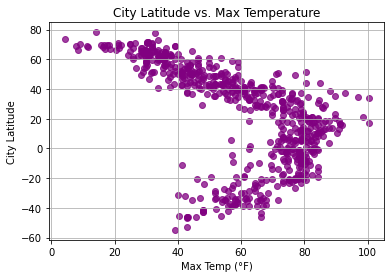

In [38]:
# Get x and y to be used by the plot
x_values = weather_df["Max Temp"]
y_values = weather_df["Lat"]

# Set up the plot
plt.scatter(x_values, y_values, marker = "o", facecolors = "purple", alpha = 0.75)
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Max Temp (°F)")
plt.ylabel("City Latitude")
plt.grid()
plt.savefig("../output_data/City_Lat_vs._Max_Temp.png")
plt.show()

In [39]:
"""This plot is showing that the closer to the equator (Lat of 0), the higher the maximum temperature.  
And vice-versa, the further from the equator, the lower the maximum temperature, with those latitudes in the Arctic
region (positive latitudes) showing lower max temps than that of the Southern Hemisphere.
"""


'This plot is showing that the closer to the equator (Lat of 0), the higher the maximum temperature.  \nAnd vice-versa, the further from the equator, the lower the maximum temperature, with those latitudes in the Arctic\nregion (positive latitudes) showing lower max temps than that of the Southern Hemisphere.\n'

## Latitude vs. Humidity Plot

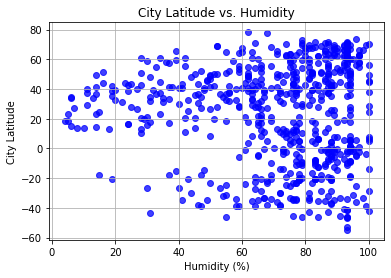

In [12]:
# Get x and y to be used by the plot
x_values = weather_df["Humidity"]
y_values = weather_df["Lat"]

# Set up the plot
plt.scatter(x_values, y_values, marker = "o", facecolors = "blue", alpha = 0.75)
plt.title("City Latitude vs. Humidity")
plt.xlabel("Humidity (%)")
plt.ylabel("City Latitude")
plt.grid()
plt.savefig("../output_data/City_Lat_vs._Humidity.png")
plt.show()

In [13]:
"""This plot is showing that most cities experienced a humidity of >60% at the collected point in time,
regardless of their position from the equator.
"""

'This plot is showing that most cities experienced a humidity of >60% at the collected point in time,\nregardless of their position from the equator.\n'

## Latitude vs. Cloudiness Plot

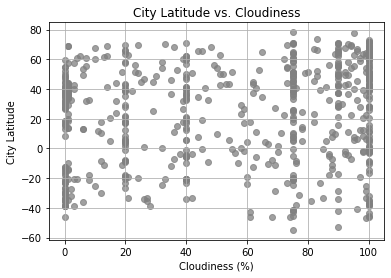

In [14]:
# Get x and y to be used by the plot
x_values = weather_df["Cloudiness"]
y_values = weather_df["Lat"]

# Set up the plot
plt.scatter(x_values, y_values, marker = "o", facecolors = "gray", alpha = 0.75)
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Cloudiness (%)")
plt.ylabel("City Latitude")
plt.grid()
plt.savefig("../output_data/City_Lat_vs._Cloudiness.png")
plt.show()

In [15]:
# This plot does not have any distinct observable trends.

## Latitude vs. Wind Speed Plot

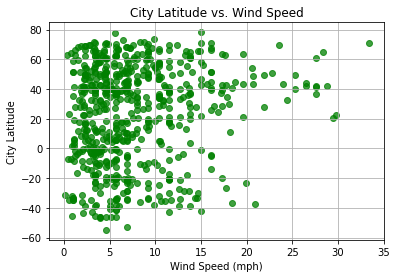

In [16]:
# Get x and y to be used by the plot
x_values = weather_df["Wind Speed"]
y_values = weather_df["Lat"]

# Set up the plot
plt.scatter(x_values, y_values, marker = "o", facecolors = "green", alpha = 0.75)
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("City Latitude")
plt.grid()
plt.savefig("../output_data/City_Lat_vs._Wind_Speed.png")
plt.show()

## Linear Regression

In [17]:
"""This plot is showing that most cities experienced a wind speed of 15 mph or less at the collected point in time,
regardless of their position from the equator.
"""

'This plot is showing that most cities experienced a wind speed of 15 mph or less at the collected point in time,\nregardless of their position from the equator.\n'

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.92 x + 93.54
The r-squared value is: 0.75


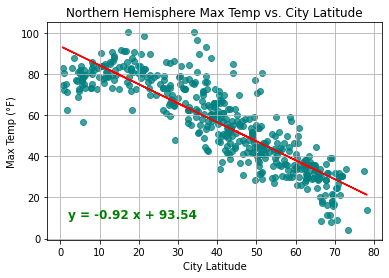

In [18]:
# Get Northern Hemisphere rows in a new df (latitudes >0 and <=90)
nh_df = weather_df[(weather_df.Lat > 0) & (weather_df.Lat <= 90)]

# Get x and y to be used by the plot
x_values = nh_df["Lat"]
y_values = nh_df["Max Temp"]

# Linear Regression Model

# Add the linear regression equation and line to the plot

# Step 1 - get the Linregress (returns slope, intercept, r value, p value, and stderr)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Step 2 - get values for y using line equation y=mx+b for annotate
regress_values = x_values * slope + intercept

# Step 3 - create the line equation for the plot
line_equation = f"y = {str(round(slope,2))} x + {str(round(intercept,2))}"
print(line_equation)

# Step 4 - Scatter and plot
plt.scatter(x_values, y_values, marker = "o", facecolors = "teal", alpha = 0.75)
plt.plot(x_values,regress_values,"r-")

# Step 5 - Annotate needs a line
plt.annotate(line_equation,(2,10),fontsize = 12, color = "green", weight = "bold")

# Step 6 - r squared value
r_sq_value = rvalue**2
print(f"The r-squared value is: {round(r_sq_value,2)}")

plt.title("Northern Hemisphere Max Temp vs. City Latitude")
plt.xlabel("City Latitude")
plt.ylabel("Max Temp (°F)")
plt.grid()
plt.savefig("../output_data/NH_Max_Temp_vs._City_Latitude.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.64 x + 80.97
The r-squared value is: 0.54


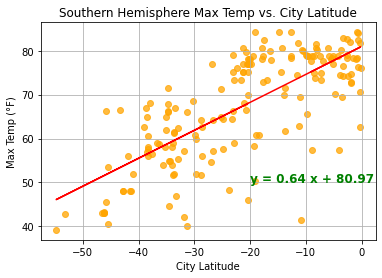

In [19]:
# Get Southern Hemisphere rows in a new df (latitudes <0 and >=90)
sh_df = weather_df[(weather_df.Lat < 0) & (weather_df.Lat >= -90)]

# Get x and y to be used by the plot
x_values = sh_df["Lat"]
y_values = sh_df["Max Temp"]

# Linear Regression Model

# Add the linear regression equation and line to the plot

# Step 1 - get the Linregress (returns slope, intercept, r value, p value, and stderr)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Step 2 - get values for y using line equation y=mx+b for annotate
regress_values = x_values * slope + intercept

# Step 3 - create the line equation for the plot
line_equation = f"y = {str(round(slope,2))} x + {str(round(intercept,2))}"
print(line_equation)

# Step 4 - Scatter and plot
plt.scatter(x_values, y_values, marker = "o", facecolors = "orange", alpha = 0.75)
plt.plot(x_values,regress_values,"r-")

# Step 5 - Annotate needs a line
plt.annotate(line_equation,(-20,50),fontsize = 12, color = "green", weight = "bold")

# Step 6 - r squared value
r_sq_value = rvalue**2
print(f"The r-squared value is: {round(r_sq_value,2)}")

plt.title("Southern Hemisphere Max Temp vs. City Latitude")
plt.xlabel("City Latitude")
plt.ylabel("Max Temp (°F)")
plt.grid()
plt.savefig("../output_data/SH_Max_Temp_vs._City_Latitude.png")
plt.show()

In [20]:
"""ANALYSIS ON NORTHERN VS. SOUTHERN HEMISPHERES - MAX TEMP vs. CITY LATITUDE:
For the Northern Hemisphere cities, the trend is that as the city latitude increases from the equator 
(further north the city is), the lower the max temperature. A 0.8 r-squared value indicates the regression 
predictions fit the data very well, and there is a strong negative relationship.  This model can be used to predict 
future relationships between these variables.

For the Southern Hemisphere cities, the trend is that as the city latitude increases from the equator 
(further north the city is), the lower the max temperature. A 0.53 r-squared value indicates the regression 
predictions are scattered around the line of best fit, and there is a positive relationship 
(although not very strong).
"""

'ANALYSIS ON NORTHERN VS. SOUTHERN HEMISPHERES - MAX TEMP vs. CITY LATITUDE:\nFor the Northern Hemisphere cities, the trend is that as the city latitude increases from the equator \n(further north the city is), the lower the max temperature. A 0.8 r-squared value indicates the regression \npredictions fit the data very well, and there is a strong negative relationship.  This model can be used to predict \nfuture relationships between these variables.\n\nFor the Southern Hemisphere cities, the trend is that as the city latitude increases from the equator \n(further north the city is), the lower the max temperature. A 0.53 r-squared value indicates the regression \npredictions are scattered around the line of best fit, and there is a positive relationship \n(although not very strong).\n'

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.22 x + 59.51
The r-squared value is: 0.03


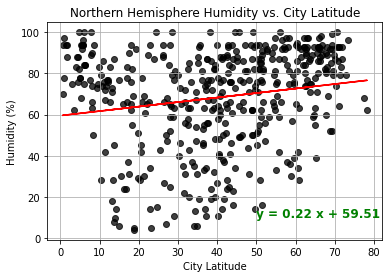

In [21]:
# Get Northern Hemisphere rows in a new df (latitudes >0 and <=90)
nh_df = weather_df[(weather_df.Lat > 0) & (weather_df.Lat <= 90)]

# Get x and y to be used by the plot
x_values = nh_df["Lat"]
y_values = nh_df["Humidity"]

# Linear Regression Model

# Add the linear regression equation and line to the plot

# Step 1 - get the Linregress (returns slope, intercept, r value, p value, and stderr)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Step 2 - get values for y using line equation y=mx+b for annotate
regress_values = x_values * slope + intercept

# Step 3 - create the line equation for the plot
line_equation = f"y = {str(round(slope,2))} x + {str(round(intercept,2))}"
print(line_equation)

# Step 4 - Scatter and plot
plt.scatter(x_values, y_values, marker = "o", facecolors = "black", alpha = 0.75)
plt.plot(x_values,regress_values,"r-")

# Step 5 - Annotate needs a line
plt.annotate(line_equation,(50,10),fontsize = 12, color = "green", weight = "bold")

# Step 6 - r squared value
r_sq_value = rvalue**2
print(f"The r-squared value is: {round(r_sq_value,2)}")

plt.title("Northern Hemisphere Humidity vs. City Latitude")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("../output_data/NH_Humidity_vs._City_Latitude.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.18 x + 81.14
The r-squared value is: 0.02


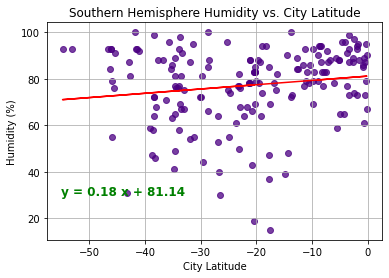

In [22]:
# Get Southern Hemisphere rows in a new df (latitudes <0 and >=-90)
sh_df = weather_df[(weather_df.Lat < 0) & (weather_df.Lat >= -90)]

# Get x and y to be used by the plot
x_values = sh_df["Lat"]
y_values = sh_df["Humidity"]

# Linear Regression Model

# Add the linear regression equation and line to the plot

# Step 1 - get the Linregress (returns slope, intercept, r value, p value, and stderr)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Step 2 - get values for y using line equation y=mx+b for annotate
regress_values = x_values * slope + intercept

# Step 3 - create the line equation for the plot
line_equation = f"y = {str(round(slope,2))} x + {str(round(intercept,2))}"
print(line_equation)

# Step 4 - Scatter and plot
plt.scatter(x_values, y_values, marker = "o", facecolors = "indigo", alpha = 0.75)
plt.plot(x_values,regress_values,"r-")

# Step 5 - Annotate needs a line
plt.annotate(line_equation,(-55,30),fontsize = 12, color = "green", weight = "bold")

# Step 6 - r squared value
r_sq_value = rvalue**2
print(f"The r-squared value is: {round(r_sq_value,2)}")

plt.title("Southern Hemisphere Humidity vs. City Latitude")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("../output_data/SH_Humidity_vs._City_Latitude.png")
plt.show()

In [23]:
"""ANALYSIS ON NORTHERN VS. SOUTHERN HEMISPHERES - HUMIDITY vs. CITY LATITUDE:
Both of these graphs for humidity vs. city latitude are showing a weak positive relationship, but the data is 
very scattered around the line of best fit, indicating the model cannot be relied upon for accurate 
future precidtions.
"""

'ANALYSIS ON NORTHERN VS. SOUTHERN HEMISPHERES - HUMIDITY vs. CITY LATITUDE:\nBoth of these graphs for humidity vs. city latitude are showing a weak positive relationship, but the data is \nvery scattered around the line of best fit, indicating the model cannot be relied upon for accurate \nfuture precidtions.\n'

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.35 x + 42.5
The r-squared value is: 0.03


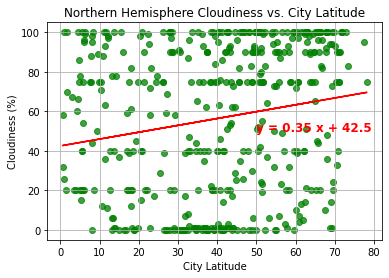

In [24]:
# Get Northern Hemisphere rows in a new df (latitudes >0 and <=90)
nh_df = weather_df[(weather_df.Lat > 0) & (weather_df.Lat <= 90)]

# Get x and y to be used by the plot
x_values = nh_df["Lat"]
y_values = nh_df["Cloudiness"]

# Linear Regression Model

# Add the linear regression equation and line to the plot

# Step 1 - get the Linregress (returns slope, intercept, r value, p value, and stderr)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Step 2 - get values for y using line equation y=mx+b for annotate
regress_values = x_values * slope + intercept

# Step 3 - create the line equation for the plot
line_equation = f"y = {str(round(slope,2))} x + {str(round(intercept,2))}"
print(line_equation)

# Step 4 - Scatter and plot
plt.scatter(x_values, y_values, marker = "o", facecolors = "green", alpha = 0.75)
plt.plot(x_values,regress_values,"r-")

# Step 5 - Annotate needs a line
plt.annotate(line_equation,(50,50),fontsize = 12, color = "red", weight = "bold")

# Step 6 - r squared value
r_sq_value = rvalue**2
print(f"The r-squared value is: {round(r_sq_value,2)}")

plt.title("Northern Hemisphere Cloudiness vs. City Latitude")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("../output_data/NH_Cloudiness_vs._City_Latitude.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.33 x + 56.25
The r-squared value is: 0.01


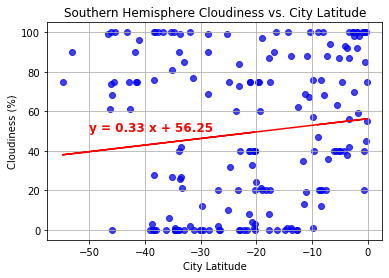

In [25]:
# Get Southern Hemisphere rows in a new df (latitudes <0 and >=-90)
sh_df = weather_df[(weather_df.Lat < 0) & (weather_df.Lat >= -90)]

# Get x and y to be used by the plot
x_values = sh_df["Lat"]
y_values = sh_df["Cloudiness"]

# Linear Regression Model

# Add the linear regression equation and line to the plot

# Step 1 - get the Linregress (returns slope, intercept, r value, p value, and stderr)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Step 2 - get values for y using line equation y=mx+b for annotate
regress_values = x_values * slope + intercept

# Step 3 - create the line equation for the plot
line_equation = f"y = {str(round(slope,2))} x + {str(round(intercept,2))}"
print(line_equation)

# Step 4 - Scatter and plot
plt.scatter(x_values, y_values, marker = "o", facecolors = "blue", alpha = 0.75)
plt.plot(x_values,regress_values,"r-")

# Step 5 - Annotate needs a line
plt.annotate(line_equation,(-50,50),fontsize = 12, color = "red", weight = "bold")

# Step 6 - r squared value
r_sq_value = rvalue**2
print(f"The r-squared value is: {round(r_sq_value,2)}")

plt.title("Southern Hemisphere Cloudiness vs. City Latitude")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("../output_data/SH_Cloudiness_vs._City_Latitude.png")
plt.show()

In [26]:
"""ANALYSIS ON NORTHERN VS. SOUTHERN HEMISPHERES - CLOUDINESS vs. CITY LATITUDE:
Both of these graphs for cloudiness vs. city latitude are showing extremely weak positive relationships, 
and the data is very scattered (and far from) the line of best fit, 
indicating the model cannot be relied upon for accurate future precidtions.
"""

'ANALYSIS ON NORTHERN VS. SOUTHERN HEMISPHERES - CLOUDINESS vs. CITY LATITUDE:\nBoth of these graphs for cloudiness vs. city latitude are showing extremely weak positive relationships, \nand the data is very scattered (and far from) the line of best fit, \nindicating the model cannot be relied upon for accurate future precidtions.\n'

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.03 x + 6.74
The r-squared value is: 0.01


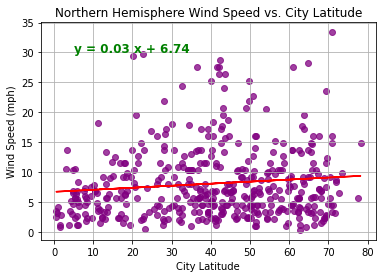

In [27]:
# Get Northern Hemisphere rows in a new df (latitudes >0 and <=90)
nh_df = weather_df[(weather_df.Lat > 0) & (weather_df.Lat <= 90)]

# Get x and y to be used by the plot
x_values = nh_df["Lat"]
y_values = nh_df["Wind Speed"]

# Linear Regression Model

# Add the linear regression equation and line to the plot

# Step 1 - get the Linregress (returns slope, intercept, r value, p value, and stderr)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Step 2 - get values for y using line equation y=mx+b for annotate
regress_values = x_values * slope + intercept

# Step 3 - create the line equation for the plot
line_equation = f"y = {str(round(slope,2))} x + {str(round(intercept,2))}"
print(line_equation)

# Step 4 - Scatter and plot
plt.scatter(x_values, y_values, marker = "o", facecolors = "purple", alpha = 0.75)
plt.plot(x_values,regress_values,"r-")

# Step 5 - Annotate needs a line
plt.annotate(line_equation,(5,30),fontsize = 12, color = "green", weight = "bold")

# Step 6 - r squared value
r_sq_value = rvalue**2
print(f"The r-squared value is: {round(r_sq_value,2)}")

plt.title("Northern Hemisphere Wind Speed vs. City Latitude")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("../output_data/NH_Wind_Speed_vs._City_Latitude.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.03 x + 5.99
The r-squared value is: 0.01


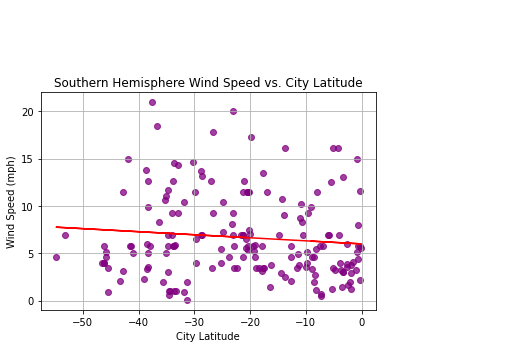

In [28]:
# Get Southern Hemisphere rows in a new df (latitudes <0 and >=-90)
sh_df = weather_df[(weather_df.Lat < 0) & (weather_df.Lat >= -90)]

# Get x and y to be used by the plot
x_values = sh_df["Lat"]
y_values = sh_df["Wind Speed"]

# Linear Regression Model

# Add the linear regression equation and line to the plot

# Step 1 - get the Linregress (returns slope, intercept, r value, p value, and stderr)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Step 2 - get values for y using line equation y=mx+b for annotate
regress_values = x_values * slope + intercept

# Step 3 - create the line equation for the plot
line_equation = f"y = {str(round(slope,2))} x + {str(round(intercept,2))}"
print(line_equation)

# Step 4 - Scatter and plot
plt.scatter(x_values, y_values, marker = "o", facecolors = "purple", alpha = 0.75)
plt.plot(x_values,regress_values,"r-")

# Step 5 - Annotate needs a line
plt.annotate(line_equation,(5,30),fontsize = 12, color = "green", weight = "bold")

# Step 6 - r squared value
r_sq_value = rvalue**2
print(f"The r-squared value is: {round(r_sq_value,2)}")

plt.title("Southern Hemisphere Wind Speed vs. City Latitude")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("../output_data/SH_Wind_Speed_vs._City_Latitude.png")
plt.show()

In [29]:
"""ANALYSIS ON NORTHERN VS. SOUTHERN HEMISPHERES - WIND SPEED vs. CITY LATITUDE:
Both of these graphs for wind speed vs. city latitude are showing extremely weak relationships.
The Northern Hemisphere regression showed an almost horizontal line, indicating almost no relationship. 
The Southern Hemisphere regression showed a slight weak negative relationship.
The model cannot be relied upon for accurate future precidtions due to the r-squared values being 0.01 and 0.09 
for Northern and Southern Hemispheres, respectively.
"""

'ANALYSIS ON NORTHERN VS. SOUTHERN HEMISPHERES - WIND SPEED vs. CITY LATITUDE:\nBoth of these graphs for wind speed vs. city latitude are showing extremely weak relationships.\nThe Northern Hemisphere regression showed an almost horizontal line, indicating almost no relationship. \nThe Southern Hemisphere regression showed a slight weak negative relationship.\nThe model cannot be relied upon for accurate future precidtions due to the r-squared values being 0.01 and 0.09 \nfor Northern and Southern Hemispheres, respectively.\n'